# Fuzzy Modeling Try

In [7]:
import numpy as np
import skfuzzy.control as ctrl
import skfuzzy as fuzz

# prior to this, need to scale income to 0-10
income = ctrl.Antecedent(np.arange(0, 25000, 1), 'income')
investment_score = ctrl.Consequent(np.arange(0, 11, 1), 'investment_score')


## Income -> Investment Score

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


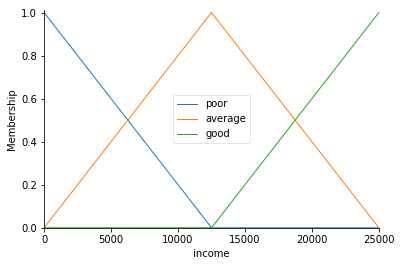

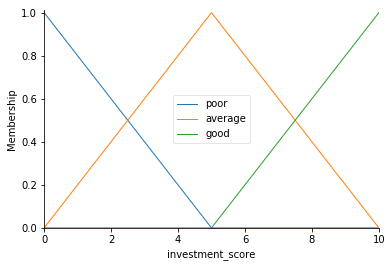

In [8]:
# income['poor'] = fuzz.trimf(income.universe, [0, 0, 10000])
# income['average'] = fuzz.trimf(income.universe, [0, 10000, 20000])
# income['good'] = fuzz.trimf(income.universe, [10000, 20000, 20000])


income.automf(3)
investment_score.automf(3)
income.view()
investment_score.view()

# Simple rule first
rule1 = ctrl.Rule(income['poor'], investment_score['poor'])
rule2 = ctrl.Rule(income['average'], investment_score['average'])
rule3 = ctrl.Rule(income['good'], investment_score['good'])

5.87825997745


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


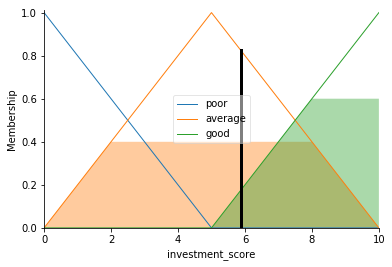

In [10]:
investment_score_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
investment_score_t = ctrl.ControlSystemSimulation(investment_score_ctrl)
investment_score_t.input['income'] = 20000

# Crunch the numbers
investment_score_t.compute()
print (investment_score_t.output['investment_score'])
investment_score.view(sim=investment_score_t)

## Age -> Investment Score

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


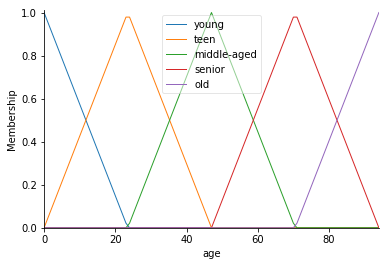

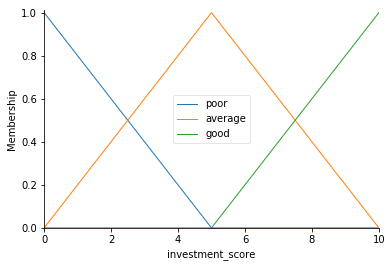

In [11]:
import numpy as np
import skfuzzy.control as ctrl
import skfuzzy as fuzz

age = ctrl.Antecedent(np.arange(0, 95, 1), 'age')
investment_score = ctrl.Consequent(np.arange(0, 11, 1), 'investment_score')
age.automf(5, names=['young', 'teen', 'middle-aged', 'senior', 'old'])
investment_score.automf(3)
age.view()
investment_score.view()



In [12]:
# Middle age people have best investment score
rule1 = ctrl.Rule(age['young'], investment_score['poor'])
rule2 = ctrl.Rule(age['teen'], investment_score['average'])
rule3 = ctrl.Rule(age['middle-aged'], investment_score['good'])
rule4 = ctrl.Rule(age['senior'], investment_score['average'])
rule5 = ctrl.Rule(age['old'], investment_score['poor'])

3.34463550602


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


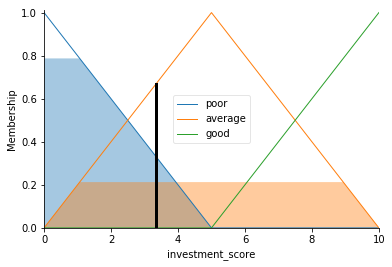

In [13]:
investment_score_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
investment_score_t = ctrl.ControlSystemSimulation(investment_score_ctrl)
investment_score_t.input['age'] = 5

# Crunch the numbers
investment_score_t.compute()
print (investment_score_t.output['investment_score'])
investment_score.view(sim=investment_score_t)

## Age -> Income_Education Weighting with range (-0.5, 0.5) 

This weighting will be used to effect the rule given "Education – a higher level is better. Education is more important for middle-aged
customers. For older customers income is more important than education-level"

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


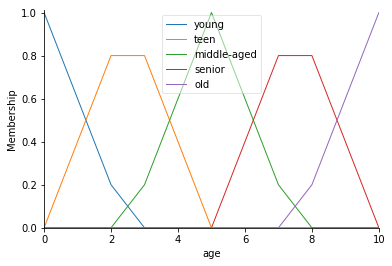

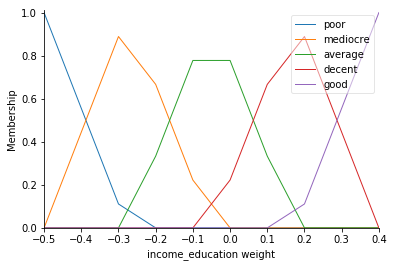

In [3]:
import numpy as np
import skfuzzy.control as ctrl
import skfuzzy as fuzz

# prior to this, need to scale age to 0-10
age = ctrl.Antecedent(np.arange(0, 11, 1), 'age')
ie_weight = ctrl.Consequent(np.arange(-0.5, 0.5, 0.1), 'income_education weight')
age.automf(5, names=['young', 'teen', 'middle-aged', 'senior', 'old'])
ie_weight.automf(5)
age.view()
ie_weight.view()


In [9]:
rule1 = ctrl.Rule(age['middle-aged'], ie_weight['good'])
rule2 = ctrl.Rule(age['senior'], ie_weight['mediocre'])
rule3 = ctrl.Rule(age['old'], ie_weight['poor']) # poor here means weighted towards income side
rule4 = ctrl.Rule(age['young'] | age['teen'], ie_weight['average'])

# rule3 = ctrl.Rule(age['middle-aged'], investment_score['good'])
# rule4 = ctrl.Rule(age['senior'], investment_score['average'])
# rule5 = ctrl.Rule(age['old'], investment_score['poor'])

0.319047619048


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


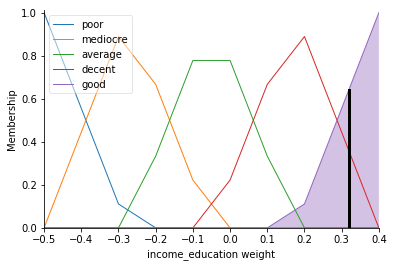

In [27]:
ie_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ie_t = ctrl.ControlSystemSimulation(ie_ctrl)
ie_t.input['age'] = 5

# Crunch the numbers
ie_t.compute()
print (ie_t.output['income_education weight'])
ie_weight_middle_age_guy = ie_t.output['income_education weight']
ie_weight.view(sim=ie_t)

-0.05


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


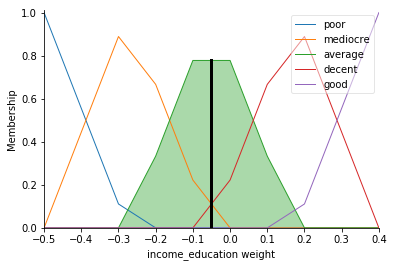

In [34]:
# Freaking young guy 
ie_t.input['age'] = 0

# Crunch the numbers
ie_t.compute()
print (ie_t.output['income_education weight'])
ie_weight_young_guy = ie_t.output['income_education weight']
ie_weight.view(sim=ie_t)

-0.419047619048


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


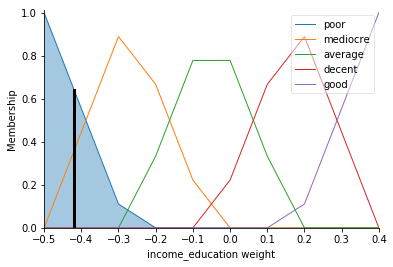

In [35]:
# Freaking old guy
ie_t.input['age'] = 10

# Crunch the numbers
ie_t.compute()
print (ie_t.output['income_education weight'])
ie_weight_old_guy = ie_t.output['income_education weight']
ie_weight.view(sim=ie_t)

## Say we have investment score due to income of this person 8, and investment score due to education of this person 5, get investment_scores if the weight we got is -0.419 (freaking old guy)

In [31]:
income_score = 8
education_score = 5
weight = ie_weight_old_guy
print(weight)

income_score_adj = ((1 - weight) * income_score + (1 + weight) * education_score) * 0.5
print("old guy's investment score, because he's old we look more at income")
print(income_score_adj)
    

-0.419047619048
old guy's investment score
7.12857142857


## now middle aged

In [33]:
weight = ie_weight_middle_age_guy
print(weight)

income_score_adj = ((1 - weight) * income_score + (1 + weight) * education_score) * 0.5
print("middle aged guy's investment score, because he's middle-aged we look more at education")
print(income_score_adj)

0.319047619048
middle aged guy's investment score
6.02142857143


## now young guy

In [37]:
weight = ie_weight_young_guy
print(weight)

income_score_adj = ((1 - weight) * income_score + (1 + weight) * education_score) * 0.5
print("young guy's investment score, because he's young, we (almost) don't touch the original individual scores and just average both")
print(income_score_adj)

-0.05
young guy's investment score, because he's young, we (almost) don't touch the original individual scores and just average both
6.575


## Other Rules

In [4]:
# males have more potential than females, this is less true for unmarried women
male_ip = 0.8
female_ip = 0.6
female_ip_unmarried = 0.7

# Occupation - retirees have low potential, professionals (doctors, lawyers etc) have the highest
ip = 0
occupation = "input"
if occupation == "retired": 
  ip = 0.2 
else: # all other professions
  ip = 0.8 


## Account Activity Fuzzy Rules

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


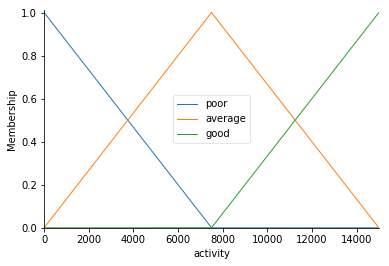

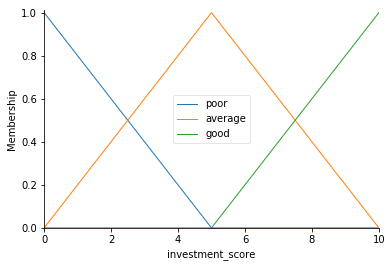

In [5]:
import numpy as np
import skfuzzy.control as ctrl
import skfuzzy as fuzz
import pandas as pd

max_activity = 15000

activity = ctrl.Antecedent(np.arange(0, max_activity, 1), 'activity')
investment_score = ctrl.Consequent(np.arange(0, 11, 1), 'investment_score')
activity.automf(3)
investment_score.automf(3)
activity.view()
investment_score.view()
rule1 = ctrl.Rule(activity['poor'], investment_score['poor'])
rule2 = ctrl.Rule(activity['average'], investment_score['average'])
rule3 = ctrl.Rule(activity['good'], investment_score['good'])
activity_is_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
activity_is_t = ctrl.ControlSystemSimulation(activity_is_ctrl)

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


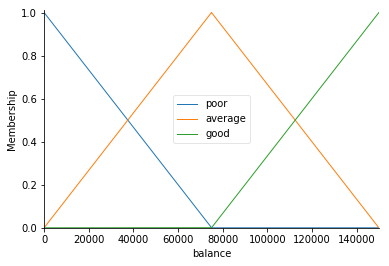

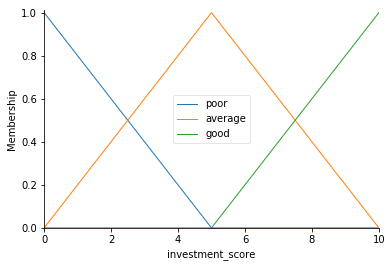

In [6]:
max_balance = 150000

balance = ctrl.Antecedent(np.arange(0, max_balance, 1), 'balance')
investment_score = ctrl.Consequent(np.arange(0, 11, 1), 'investment_score')
balance.automf(3)
investment_score.automf(3)
balance.view()
investment_score.view()
rule1 = ctrl.Rule(balance['poor'], investment_score['poor'])
rule2 = ctrl.Rule(balance['average'], investment_score['average'])
rule3 = ctrl.Rule(balance['good'], investment_score['good'])
balance_is_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
balance_is_t = ctrl.ControlSystemSimulation(balance_is_ctrl)